In [84]:
import torch

In [85]:
torch.cuda.is_available()

True

In [86]:
torch.cuda.device_count()

1

In [87]:
torch.cuda.get_device_name()

'NVIDIA RTX A6000'

In [88]:
mytensor = torch.tensor([1,2])

In [89]:
mytensor.device

device(type='cpu')

In [90]:
mytensor.to('cuda')

tensor([1, 2], device='cuda:0')

In [91]:
mytensor.device

device(type='cpu')

In [92]:
mytensorgpu = mytensor.to('cuda')

In [93]:
mytensorgpu.device

device(type='cuda', index=0)

In [94]:
device = torch.device('cuda') 

In [95]:
mytemp = torch.tensor([1,2,3])

In [96]:
mytemp.device

device(type='cpu')

In [83]:
1+1

2

## Another Function: Saddle Point ##

In [97]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [98]:
tempX = np.random.uniform(-1,1,2000)
tempY = np.random.uniform(-1,1,2000)

In [99]:
myX = np.array([tempX, tempY]).T

In [100]:
myX[:5]

array([[-0.23243988, -0.3509104 ],
       [-0.96937549, -0.0867042 ],
       [ 0.47410144,  0.28749426],
       [ 0.3485642 , -0.56330771],
       [-0.91306455, -0.96492934]])

In [101]:
def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

In [102]:
myy = myfunc(myX)

In [103]:
myy[:5]

array([-0.06910981,  0.93217122,  0.14211923, -0.19581857, -0.09740177])

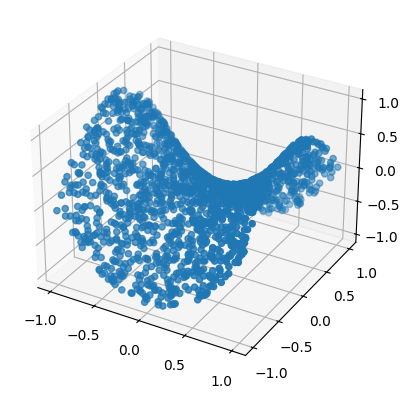

In [104]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(myX[:,0], myX[:,1], myy)
plt.show()

In [105]:
myXtensor = torch.from_numpy(myX)

In [106]:
myXtensor.device

device(type='cpu')

In [107]:
myXtensor = myXtensor.to('cuda')

In [108]:
myXtensor[:5]

tensor([[-0.2324, -0.3509],
        [-0.9694, -0.0867],
        [ 0.4741,  0.2875],
        [ 0.3486, -0.5633],
        [-0.9131, -0.9649]], device='cuda:0', dtype=torch.float64)

In [109]:
myXtensor.shape

torch.Size([2000, 2])

In [110]:
myytensor = torch.from_numpy(myy).to('cuda')

In [111]:
myytensor

tensor([-0.0691,  0.9322,  0.1421,  ...,  0.7146,  0.5971,  0.6678],
       device='cuda:0', dtype=torch.float64)

In [112]:
myytensor[:5]

tensor([-0.0691,  0.9322,  0.1421, -0.1958, -0.0974], device='cuda:0',
       dtype=torch.float64)

In [113]:
myytensor.shape

torch.Size([2000])

In [114]:
myytensor.dtype

torch.float64

In [115]:
train_ds = torch.utils.data.TensorDataset(myXtensor, myytensor)

In [116]:
batch_size = 20

In [117]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)

In [122]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.ReLU()(x)
        x = self.layer2(x)
        x = nn.ReLU()(x)
        x = self.layer3(x)
        return x
    
input_size = 2
hidden_size = 32
output_size = 1
 
model = Model(input_size, hidden_size, output_size)
model = model.to('cuda')

learning_rate = 0.0001

loss_fn = nn.MSELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [123]:
print(model)

Model(
  (layer1): Linear(in_features=2, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)


In [126]:
num_epochs = 200
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = torch.squeeze(model(x_batch.float()))
        loss = loss_fn(pred, y_batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        print("Epoch is ", epoch, ' and MSE is ', loss.item())
#        loss_hist[epoch] += loss.item()*y_batch.size(0)
#        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
#        accuracy_hist[epoch] += is_correct.sum()
#        
#    loss_hist[epoch] /= len(train_dl.dataset)
#    accuracy_hist[epoch] /= len(train_dl.dataset)

Epoch is  0  and MSE is  0.00011062566045438871
Epoch is  5  and MSE is  0.00011155378160765395
Epoch is  10  and MSE is  0.00010883848881348968
Epoch is  15  and MSE is  8.93419492058456e-05
Epoch is  20  and MSE is  8.500337571604177e-05
Epoch is  25  and MSE is  5.152776066097431e-05
Epoch is  30  and MSE is  7.159444794524461e-05
Epoch is  35  and MSE is  6.374159420374781e-05
Epoch is  40  and MSE is  4.623167842510156e-05
Epoch is  45  and MSE is  7.45127399568446e-05
Epoch is  50  and MSE is  7.61632327339612e-05
Epoch is  55  and MSE is  6.835724343545735e-05
Epoch is  60  and MSE is  5.3519175708061084e-05
Epoch is  65  and MSE is  7.563280814792961e-05
Epoch is  70  and MSE is  4.089538560947403e-05
Epoch is  75  and MSE is  3.24579123116564e-05
Epoch is  80  and MSE is  0.00010931082215392962
Epoch is  85  and MSE is  4.0949060348793864e-05
Epoch is  90  and MSE is  6.82052705087699e-05
Epoch is  95  and MSE is  3.663891038740985e-05
Epoch is  100  and MSE is  4.565047129290